In [215]:
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import RobustScaler, FunctionTransformer
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import plotly.express as px

In [216]:
X_train = pd.read_csv(os.path.join(os.getcwd(), "data", "X_train.csv"))
X_test = pd.read_csv(os.path.join(os.getcwd(), "data", "X_test.csv"))
y_train = pd.read_csv(os.path.join(os.getcwd(), "data", "y_train.csv"))
y_test = pd.read_csv(os.path.join(os.getcwd(), "data", "y_test.csv"))

In [217]:
def log_transform(x):
    return np.log(x+1-x.min())

numerical_features = ["age", "balance", "duration", "campaign", "pdays", "previous","last_contact_day"]
categorical_features = [col for col in X_train.columns if col not in numerical_features]

vars = ["duration", "campaign", "pdays", "previous"]
log_transform=FunctionTransformer(log_transform)
log_transform.fit(X_train[vars])
X_train[vars] = log_transform.transform(X_train[vars])
X_test[vars] = log_transform.transform(X_test[vars])

rbst=RobustScaler()
rbst.fit(X_train[numerical_features])
X_train[numerical_features] = rbst.transform(X_train[numerical_features])
X_test[numerical_features] = rbst.transform(X_test[numerical_features])

# Histogram
fig = px.histogram(X_train[numerical_features].melt(), x='value', facet_col='variable').update_xaxes(matches=None).update_yaxes(matches=None)
fig.show()

In [218]:
X_train = pd.get_dummies(X_train, columns = categorical_features)
X_test = pd.get_dummies(X_test, columns = categorical_features)

In [219]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
X_train, y_train = rus.fit_resample(X_train, y_train)

In [220]:
fig = px.histogram(X_train[numerical_features].melt(), x='value', facet_col='variable').update_xaxes(matches=None).update_yaxes(matches=None)
fig.show()

In [221]:
y_train.value_counts() / len(y_train)

y
0    0.5
1    0.5
dtype: float64

In [222]:
X_train.shape

(4250, 39)

In [226]:
model = LogisticRegressionCV(cv=5,max_iter=1000,random_state=0)
#model = LogisticRegression(max_iter=1000,random_state=0)

Accuracy: 0.81 - Precision: 0.82 - Recall: 0.25 - F1 Score: 0.39


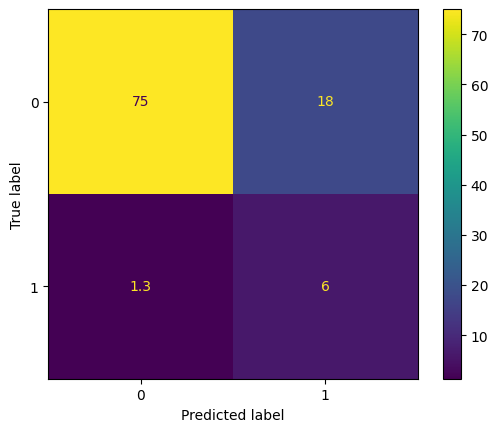

In [227]:
# Fit the classifier
model.fit(X_train, y_train.values.ravel())

# Make predictions
predictions = model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(predictions, y_test.values.ravel())
precision = precision_score(predictions, y_test.values.ravel())
recall = recall_score(predictions, y_test.values.ravel())
f1score = f1_score(predictions, y_test.values.ravel())

cm = 100 * confusion_matrix(y_test.values.ravel(), predictions, labels=model.classes_) / len(y_test.values.ravel())
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

print(f"Accuracy: {accuracy:.2f} - Precision: {precision:.2f} - Recall: {recall:.2f} - F1 Score: {f1score:.2f}")
disp.plot()
plt.show()

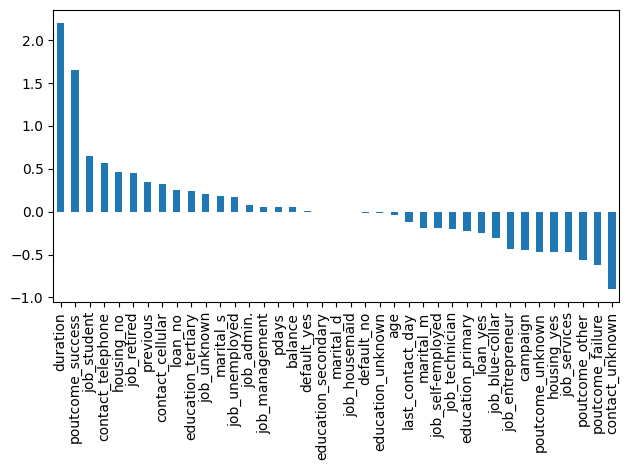

In [225]:
importances = pd.Series(model.coef_[0], index=model.feature_names_in_)
fig, ax = plt.subplots()
importances.plot.bar()
fig.tight_layout()